In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
from google.colab import files

uploaded = files.upload()

Saving Final_NFL_Draft_Data_2000_2021.csv to Final_NFL_Draft_Data_2000_2021.csv


**Abstract:**
By looking at NFL Draft Classes from 2000 to 2021, as well as each players NFL combine data, this expirement looked at the 2021 QB draft class. The goal was to predict where each of the 10 Rookie QBs would be drafted in the 2021 NFL Draft. The draft took place on the last weekend of April 2021, and these rookie QBs have not played one game in the NFL yet, but this experiment looked at predicting their value and where a team should have drafted them in the draft, which could then be compared to the actual results from a few weeks ago.

**Introduction:**
The NFL Draft took place in April 2021 and the goal of this experiment was to predict where each of the 10 rookie Quarterbacks would be selected in the draft. My dataset consists of NFL Draft stats from 2000 – 2021 as well as NFL Combine results. I wanted to know which stats are relevant as well as which combine drills are a better indicator than others. This is a regression problem, as it is predicting the rookie quarterbacks draft pick number, which would then be compared to the actual results from the draft this year. 

The reason why I want to predict the draft picks of the new rookie class and compare it to their actual draft picks is because I see a lot of potential with this class. Most of them have a lot of potential and I wanted to see who really is the next big thing. This can also be used to help NFL teams draft a quarterback in the future if they need one by looking at next years class' combine results that take place right before the draft in 2022.


**Motivation/State of the Art:** The reason why I want to look at this dataset and predict the Quarterback draft picks is because I am a very big football fan, with high hopes for next year. This years Quarterback draft class was very strong with a lot of potential. I have tried to look past experiments done, however I have not seen any results for this years draft class. I did find one for the 2018 NFL draft, and it seemed to have a similar result, however there were more quarterbacks that year than this year. There are a lot of other projects that seem to look at Draft Kings and other fantasy football like apps. These websites are used by people who want to draft their own team and get points for how well they do in real life, which I honestly did not even think about, and I could be interested in exploring it in the future.

In [ ]:
df = pd.read_csv('Final_NFL_Draft_Data_2000_2021.csv')

In [ ]:
df.head()

,Rnd,Pick,Year,Team,Player,Pos,Age,To,AP,PB,St,CarAV,DrAV,G,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TD,Rec,Rec_Yds,Rec_TD,Def_Solo,Def_Int,Def_Sk,School,40_Yd,Vertical,Bench,Broad_Jump,3_Cone,Shuttle
0,1,18,2000,NYJ,Chad Pennington,QB,24.0,2010.0,0,0,5,55.0,41.0,89.0,1632.0,2471.0,17823.0,102.0,64.0,180.0,465.0,7.0,0.0,7.0,0.0,NaN,NaN,NaN,Marshall,4.81,33.5,NaN,111.0,7.12,4.16
1,3,65,2000,SFO,Giovanni Carmazzi,QB,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hofstra,4.74,36.5,NaN,119.0,6.94,4.23
2,3,75,2000,BAL,Chris Redman,QB,23.0,2011.0,0,0,0,9.0,3.0,31.0,286.0,500.0,3179.0,21.0,14.0,33.0,25.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Louisville,5.37,26.5,NaN,98.0,7.80,4.78
3,5,163,2000,PIT,Tee Martin,QB,22.0,2003.0,0,0,0,0.0,0.0,3.0,6.0,16.0,69.0,0.0,1.0,6.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Tennessee,4.58,34.5,NaN,113.0,NaN,NaN
4,6,168,2000,NOR,Marc Bulger,QB,23.0,2009.0,0,2,8,57.0,NaN,96.0,1969.0,3171.0,22814.0,122.0,93.0,118.0,300.0,8.0,4.0,21.0,0.0,NaN,NaN,NaN,West Virginia,4.97,NaN,NaN,100.0,7.46,4.34


**Data:** This is the NFL data from 2000 - 2021. It consists of every NFL player drafted between those years, their NFL stats as well as the NFL Combine results. This data was all from https://www.pro-football-reference.com/draft/ and exported to a CSV file. It is sorted by position, then draft year, and then draft round and pick. The features include information about the player: name, draft pick, pos, as well as their NFL stats, and even their combine results from before their draft. When I was originally starting to work on my project, I was going to use NFL and College stats for my dataset, however I was unsuccessful with using college stats. The reason for this is because of Covid, not every school had a season, and not every player played. It created a very big gap between even the best players and my predictions were very close to 0%. 

In [ ]:
df.fillna(df.mean(), inplace=True)

This dataset consisted of a lot of missing values. It is not because the data set is missing values, it is because every player does not simply do everything. For example a running back does not throw the ball, and a quarterback does not get a sack. To fix this, I was able to set set the empty values to the average value so that it would not affect the predictions.

In [ ]:
row,col = df.shape
print("")
print('\033[1m'+'This is the NFL Draft Dataset.','\033[0m')
print('\033[1m'+'While looking at the NFL Draft Dataset below:','\033[0m')
print('\033[1m'+'We can see that this dataset has', row, 'instances, and', col, 'features.\n\n','\033[0m')

df.head()


This is the NFL Draft Dataset. 
While looking at the NFL Draft Dataset below: 
We can see that this dataset has 5456 instances, and 35 features.

 


,Rnd,Pick,Year,Team,Player,Pos,Age,To,AP,PB,St,CarAV,DrAV,G,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TD,Rec,Rec_Yds,Rec_TD,Def_Solo,Def_Int,Def_Sk,School,40_Yd,Vertical,Bench,Broad_Jump,3_Cone,Shuttle
0,1,18,2000,NYJ,Chad Pennington,QB,24.000000,2010.000000,0,0,5,55.000000,41.000000,89.000000,1632.000000,2471.000000,17823.000000,102.000000,64.000000,180.00000,465.000000,7.000000,0.00000,7.00000,0.000000,103.401789,5.882777,11.021869,Marshall,4.81,33.500000,21.427407,111.0,7.120000,4.160000
1,3,65,2000,SFO,Giovanni Carmazzi,QB,22.483082,2014.236731,0,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Hofstra,4.74,36.500000,21.427407,119.0,6.940000,4.230000
2,3,75,2000,BAL,Chris Redman,QB,23.000000,2011.000000,0,0,0,9.000000,3.000000,31.000000,286.000000,500.000000,3179.000000,21.000000,14.000000,33.00000,25.000000,0.000000,0.00000,0.00000,0.000000,103.401789,5.882777,11.021869,Louisville,5.37,26.500000,21.427407,98.0,7.800000,4.780000
3,5,163,2000,PIT,Tee Martin,QB,22.000000,2003.000000,0,0,0,0.000000,0.000000,3.000000,6.000000,16.000000,69.000000,0.000000,1.000000,6.00000,36.000000,0.000000,0.00000,0.00000,0.000000,103.401789,5.882777,11.021869,Tennessee,4.58,34.500000,21.427407,113.0,7.252479,4.375892
4,6,168,2000,NOR,Marc Bulger,QB,23.000000,2009.000000,0,2,8,57.000000,12.891782,96.000000,1969.000000,3171.000000,22814.000000,122.000000,93.000000,118.00000,300.000000,8.000000,4.00000,21.00000,0.000000,103.401789,5.882777,11.021869,West Virginia,4.97,33.345298,21.427407,100.0,7.460000,4.340000


In [ ]:
df.dtypes

Rnd             int64
Pick            int64
Year            int64
Team           object
Player         object
Pos            object
Age           float64
To            float64
AP              int64
PB              int64
St              int64
CarAV         float64
DrAV          float64
G             float64
Pass_Cmp      float64
Pass_Att      float64
Pass_Yds      float64
Pass_TD       float64
Pass_Int      float64
Rush_Att      float64
Rush_Yds      float64
Rush_TD       float64
Rec           float64
Rec_Yds       float64
Rec_TD        float64
Def_Solo      float64
Def_Int       float64
Def_Sk        float64
School         object
40_Yd         float64
Vertical      float64
Bench         float64
Broad_Jump    float64
3_Cone        float64
Shuttle       float64
dtype: object

Apart from the team name, player, position, and school the other features consists of integers and floating point numbers.

In [ ]:
import pandas as pd
from statistics import mean

df.isnull().mean() * 100

Rnd           0.000000
Pick          0.000000
Year          0.000000
Team          0.000000
Player        0.000000
Pos           0.000000
Age           0.000000
To            0.000000
AP            0.000000
PB            0.000000
St            0.000000
CarAV         0.000000
DrAV          0.000000
G             0.000000
Pass_Cmp      0.000000
Pass_Att      0.000000
Pass_Yds      0.000000
Pass_TD       0.000000
Pass_Int      0.000000
Rush_Att      0.000000
Rush_Yds      0.000000
Rush_TD       0.000000
Rec           0.000000
Rec_Yds       0.000000
Rec_TD        0.000000
Def_Solo      0.000000
Def_Int       0.000000
Def_Sk        0.000000
School        0.036657
40_Yd         0.000000
Vertical      0.000000
Bench         0.000000
Broad_Jump    0.000000
3_Cone        0.000000
Shuttle       0.000000
dtype: float64

This was to check that there are no missing values. The reason why the only missing value is "School" with about 3.67% missing, is because some players are drafted after playing in an international league, or rugby league overseas and there is not a college requirement like there is for players coming from College today. Now, the NFL has a rule that to be eligable for the NFL draft, you must be out of highschool for at least 3 years before playing in the NFL. 

In [ ]:
print("Rnd:",round((df.var()['Rnd']),2))
print("Pick:",round((df.var()['Pick']),2))
print("Year:",round((df.var()['Year']),2))
print("Age:",round((df.var()['Age']),2))
print("To:",round((df.var()['To']),2))
print("AP:",round((df.var()['AP']),2))
print("PB:",round((df.var()['PB']),2))
print("St:",round((df.var()['St']),2))
print("CarAV:",round((df.var()['CarAV']),2))
print("DrAV:",round((df.var()['DrAV']),2))
print("G:",round((df.var()['G']),2))
print("Pass_Cmp:",round((df.var()['Pass_Cmp']),2))
print("Pass_Att:",round((df.var()['Pass_Att']),2))
print("Pass_TD:",round((df.var()['Pass_TD']),2))
print("Pass_Int:",round((df.var()['Pass_Int']),2))
print("Rush_Att:",round((df.var()['Rush_Att']),2))
print("Rush_Yds:",round((df.var()['Rush_Yds']),2))
print("Rush_TD:",round((df.var()['Rush_TD']),2))
print("Rec:",round((df.var()['Rec']),2))
print("Rec_Yds:",round((df.var()['Rec_Yds']),2))
print("Rec_TD:",round((df.var()['Rec_TD']),2))
print("Def_Solo:",round((df.var()['Def_Solo']),2))
print("Def_Int:",round((df.var()['Def_Int']),2))
print("Def_Sk:",round((df.var()['Def_Sk']),2))
print("40_Yd:",round((df.var()['40_Yd']),2))
print("Vertical:",round((df.var()['Vertical']),2))
print("Bench:",round((df.var()['Bench']),2))
print("Broad_Jump:",round((df.var()['Broad_Jump']),2))
print("3_Cone:",round((df.var()['3_Cone']),2))
print("Shuttle:",round((df.var()['Shuttle']),2))




Rnd: 4.04
Pick: 5439.12
Year: 40.15
Age: 0.77
To: 25.89
AP: 0.16
PB: 1.1
St: 7.74
CarAV: 372.04
DrAV: 250.0
G: 1948.04
Pass_Cmp: 74806.96
Pass_Att: 186721.99
Pass_TD: 433.8
Pass_Int: 116.99
Rush_Att: 38165.61
Rush_Yds: 708056.3
Rush_TD: 40.26
Rec: 8815.5
Rec_Yds: 1383153.23
Rec_TD: 58.82
Def_Solo: 12486.1
Def_Int: 10.4
Def_Sk: 90.98
40_Yd: 0.07
Vertical: 11.43
Bench: 24.37
Broad_Jump: 57.18
3_Cone: 0.09
Shuttle: 0.04


Above is the variance for each of the features in the data set. Age and all pro selections are close to 0, so they were removed as they do not have much affect on the prediction. This makes a lot of sense as, pretty much every player drafted is around the same age because they are required to go to school for at least three years, and the number of all pro selections are not determined by their draft pick, but instead how well they play in the NFL. The NFL and college are two different football games, and there are many rules that are different between the two of them. For example in college you only need 1 foot in bounds, for it to be considered a catch, put in the NFL, you need both feet in bounds. Often times, players who are very good in college do not turn out to be the best in the NFL.

In [ ]:
df.drop('Age', inplace = True, axis = 1)
df.drop('AP', inplace = True, axis = 1)
df.drop('3_Cone', inplace = True, axis = 1)
df.drop('40_Yd', inplace = True, axis = 1)
df.drop('Shuttle', inplace = True, axis = 1)


In [ ]:
df.describe()

,Rnd,Pick,Year,To,PB,St,CarAV,DrAV,G,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TD,Rec,Rec_Yds,Rec_TD,Def_Solo,Def_Int,Def_Sk,Vertical,Bench,Broad_Jump
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,4.165872,126.774560,2010.508981,2014.236731,0.272727,1.787207,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.897430,178.012848,1.284962,30.969040,359.308340,2.196925,103.401789,5.882777,11.021869,33.345298,21.427407,115.346543
std,2.009185,73.750376,6.336364,5.088293,1.049131,2.782291,19.288281,15.811274,44.136651,273.508602,432.113394,3160.363634,20.827750,10.816353,195.360202,841.460812,6.345122,93.890888,1176.075352,7.669584,111.741197,3.224299,9.538237,3.380694,4.936563,7.561610
min,1.000000,1.000000,2000.000000,2000.000000,0.000000,0.000000,-4.000000,-4.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-21.000000,0.000000,0.000000,-16.000000,0.000000,1.000000,1.000000,0.500000,20.500000,2.000000,83.000000
25%,2.000000,63.000000,2005.000000,2011.000000,0.000000,0.000000,2.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.882777,11.021869,32.500000,20.000000,114.000000
50%,4.000000,126.000000,2011.000000,2014.236731,0.000000,0.000000,11.000000,10.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.401789,5.882777,11.021869,33.345298,21.427407,115.346543
75%,6.000000,191.000000,2016.000000,2020.000000,0.000000,3.000000,20.000000,14.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,38.250000,0.000000,30.969040,359.308340,2.000000,103.401789,5.882777,11.021869,35.000000,23.000000,119.000000
max,7.000000,262.000000,2021.000000,2020.000000,14.000000,19.000000,179.000000,170.000000,301.000000,7142.000000,10598.000000,80358.000000,581.000000,244.000000,3735.000000,16000.000000,145.000000,1432.000000,17492.000000,121.000000,1077.000000,64.000000,159.500000,46.000000,49.000000,147.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rnd         5456 non-null   int64  
 1   Pick        5456 non-null   int64  
 2   Year        5456 non-null   int64  
 3   Team        5456 non-null   object 
 4   Player      5456 non-null   object 
 5   Pos         5456 non-null   object 
 6   To          5456 non-null   float64
 7   PB          5456 non-null   int64  
 8   St          5456 non-null   int64  
 9   CarAV       5456 non-null   float64
 10  DrAV        5456 non-null   float64
 11  G           5456 non-null   float64
 12  Pass_Cmp    5456 non-null   float64
 13  Pass_Att    5456 non-null   float64
 14  Pass_Yds    5456 non-null   float64
 15  Pass_TD     5456 non-null   float64
 16  Pass_Int    5456 non-null   float64
 17  Rush_Att    5456 non-null   float64
 18  Rush_Yds    5456 non-null   float64
 19  Rush_TD     5456 non-null  

While looking at the info of the dataframe, there are 32 instances. 4 of them are objects (team, player, position, and school), which are all strings. The other 28 instances are either floats or integers.

In [ ]:
qb = df[df['Pos']=='QB']
rb = df[df['Pos']=='RB']
wr = df[df['Pos']=='WR']
te = df[df['Pos']=='TE']
oline = df[(df['Pos']=='T') | (df['Pos']=='G') | (df['Pos']=='C') | (df['Pos']=='OL')]
dline = df[(df['Pos']=='DE') | (df['Pos']=='DT') | (df['Pos']=='NT') | (df['Pos']=='DL')]
lb = df[(df['Pos']=='LB') | (df['Pos']=='OLB') | (df['Pos']=='ILB')]
db = df[(df['Pos']=='DB') | (df['Pos']=='CB') | (df['Pos']=='S')]

throwing = qb
running = rb
catching = df[(df['Pos']=='WR') | (df['Pos']=='TE')]
offense = df[(df['Pos']=='QB') | (df['Pos']=='RB') | (df['Pos']=='WR') | (df['Pos']=='TE') | (df['Pos']=='T') | (df['Pos']=='G') | (df['Pos']=='C') | (df['Pos']=='OL')]
defense = df[(df['Pos']=='DE') | (df['Pos']=='DT') | (df['Pos']=='NT') | (df['Pos']=='DL') | (df['Pos']=='LB') | (df['Pos']=='OLB') | (df['Pos']=='ILB') | (df['Pos']=='DB') | (df['Pos']=='CB') | (df['Pos']=='S')]

Above, I was able to make data frames for each of the eight position groups in the NFL. I did this so that I can take a look at the relationships of the features with the individual positions as some teachers may affect one position a lot more than another.

In [ ]:
round1 = df[df['Rnd'] == 1]
round2 = df[df['Rnd'] == 2]
round3 = df[df['Rnd'] == 3]
round4 = df[df['Rnd'] == 4]
round5 = df[df['Rnd'] == 5]
round6 = df[df['Rnd'] == 6]
round7 = df[df['Rnd'] == 7]

day1 = round1
day2 = pd.concat([round2,round3],ignore_index=True)
day3 = pd.concat([round4,round5],ignore_index=True)
day4 = pd.concat([round6,round7],ignore_index=True)

**Experiments:**

I also was able to make data frams for each of the 7 rounds. The reason why I did this was so that I would be able to plot the relationships to get an idea of how much they impact the draft picks. For example, I could look at any of the combine features, 40yd, Vertical, Bench, Broad Jump, or Shuttle, to see if they have a relationship with where in the draft they are selected. This can also be done with any of the other features for the NFL stats.

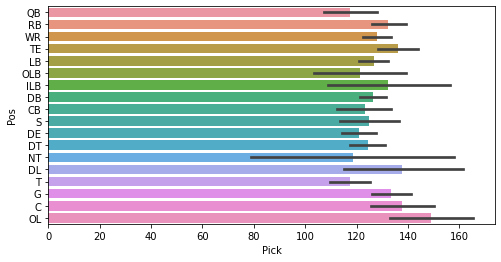

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x='Pick', y='Pos', data=df)

This is a bar graph that shows the relationships between draft picks and position. They are all very similar, and this is expected as all of the players can be selected at any point during the draft. It is important to note, however, it seems like QBs and Tackles have an average draft pick earlier in the draft than OL or DL. This makes sense as the QB is one of the most important positions in the NFL and and the Tackles job is to protect the Quarterback, another important position. The better the job the tackle does, the longer the quarterback is able to throw the ball, meaning they will have a better performance as every second matters when the ball is snapped.

Text(0.5, 1.0, 'Pick vs. Def_Sk (DLine)')

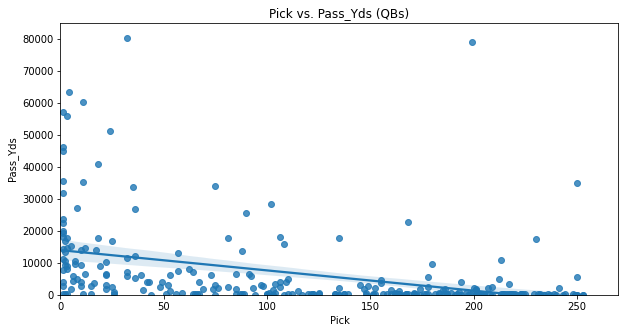

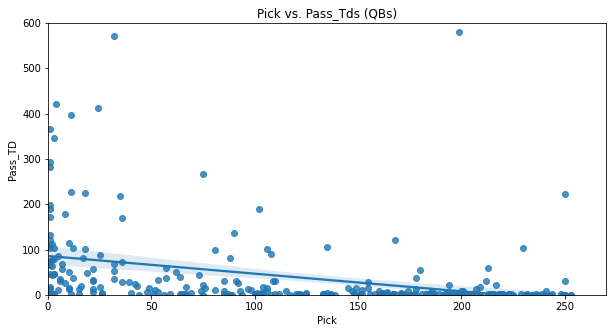

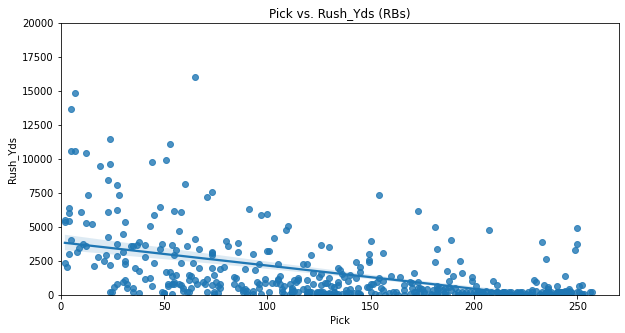

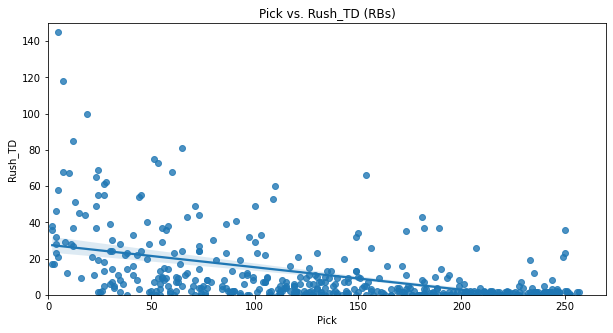

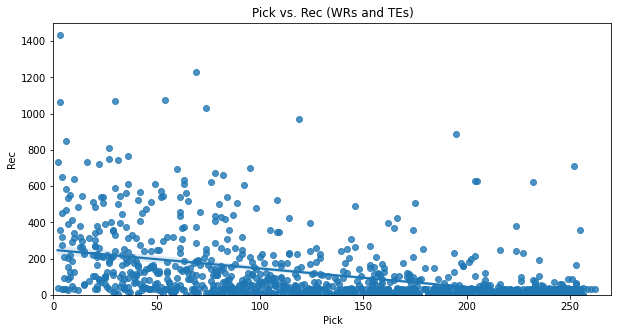

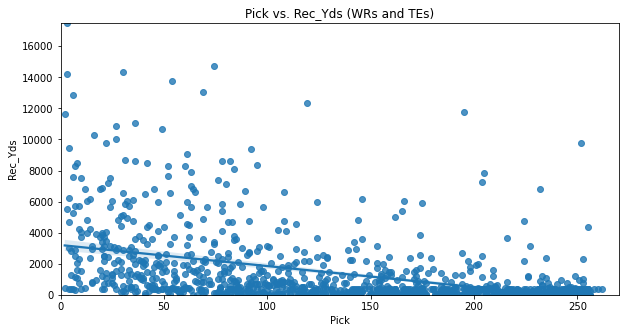

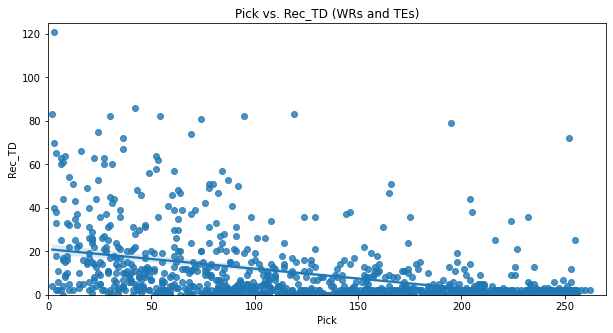

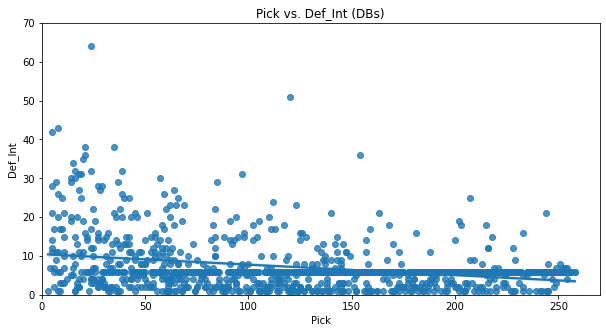

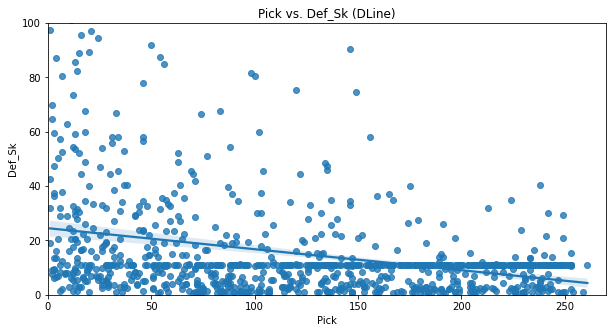

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Pass_Yds', data=throwing)
plt.xlim(0, 270)
plt.ylim(0, 85000)
plt.title('Pick vs. Pass_Yds (QBs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Pass_TD', data=throwing)
plt.xlim(0, 270)
plt.ylim(0, 600)
plt.title('Pick vs. Pass_Tds (QBs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Rush_Yds', data=running)
plt.xlim(0, 270)
plt.ylim(0, 20000)
plt.title('Pick vs. Rush_Yds (RBs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Rush_TD', data=running)
plt.xlim(0, 270)
plt.ylim(0, 150)
plt.title('Pick vs. Rush_TD (RBs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Rec', data=catching)
plt.xlim(0, 270)
plt.ylim(0, 1500)
plt.title('Pick vs. Rec (WRs and TEs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Rec_Yds', data=catching)
plt.xlim(0, 270)
plt.ylim(0, 17500)
plt.title('Pick vs. Rec_Yds (WRs and TEs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Rec_TD', data=catching)
plt.xlim(0, 270)
plt.ylim(0, 125)
plt.title('Pick vs. Rec_TD (WRs and TEs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Def_Int', data=db)
plt.xlim(0, 270)
plt.ylim(0, 70)
plt.title('Pick vs. Def_Int (DBs)')

plt.figure(figsize=(10,5))
sns.regplot(x='Pick', y='Def_Sk', data=dline)
plt.xlim(0, 270)
plt.ylim(0, 100)
plt.title('Pick vs. Def_Sk (DLine)')

I now wanted to look at the relationship between the players football stats and their draft pick. As expected, the higher the stat, meaning the more success they have had, on average, they were picked earlier in the draft. It is interesting to see that, on average, receptions have a lot more affect on their draft than actual TDs. It is very hard to compare these, as the ranges are very different. This makes sense because you can throw the ball 100 yards on one play, which is very difficult to do, and nearly impossible, however it is NOT possible to throw 100 TDs in one play. However, these results make a lot of sense as the better a player does, on average, the earlier they will be selected in the draft.

Text(0.5, 1.0, 'Pos in 7th Round')

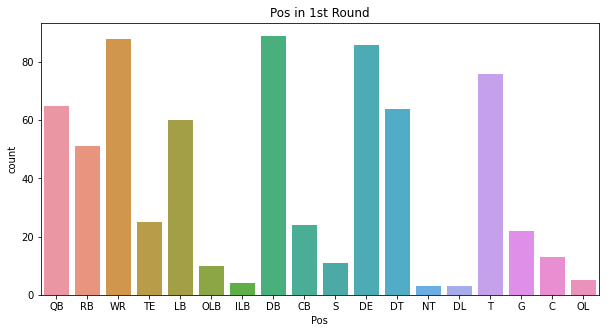

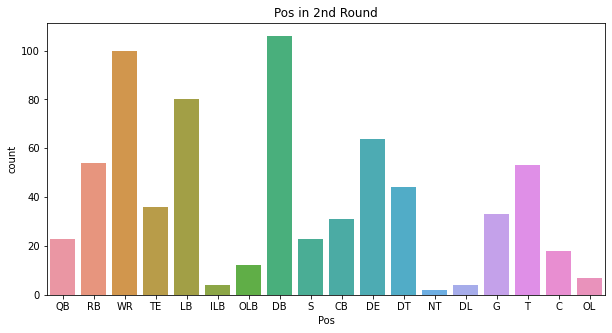

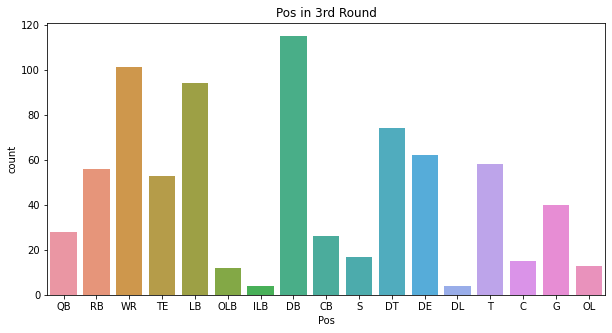

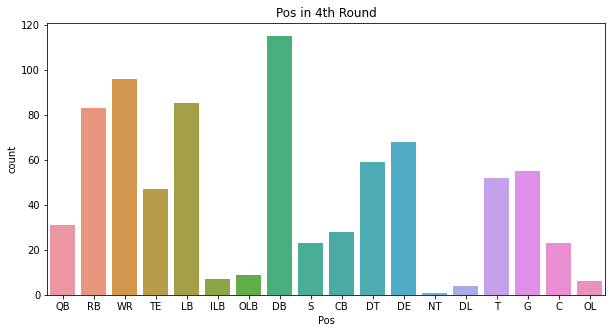

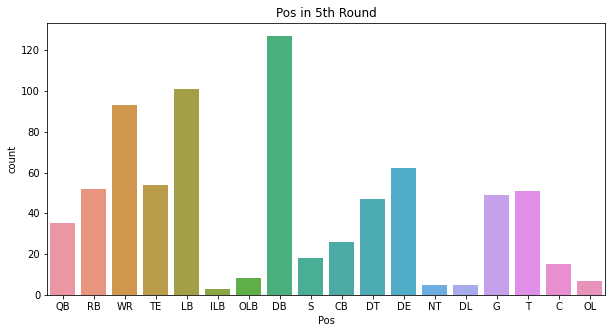

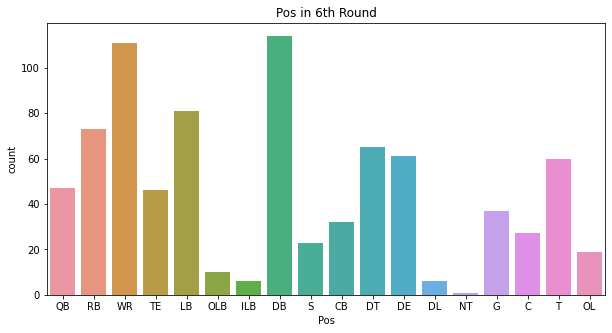

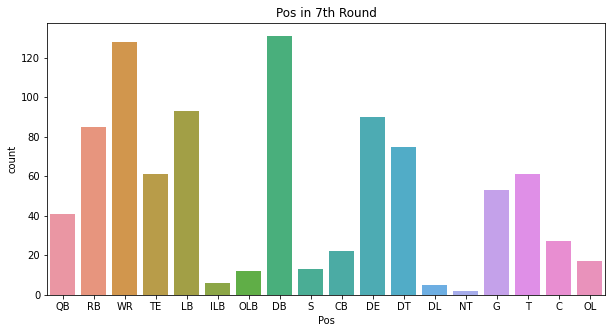

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round1)
plt.title('Pos in 1st Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round2)
plt.title('Pos in 2nd Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round3)
plt.title('Pos in 3rd Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round4)
plt.title('Pos in 4th Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round5)
plt.title('Pos in 5th Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round6)
plt.title('Pos in 6th Round')

plt.figure(figsize=(10, 5))
sns.countplot(x='Pos', data = round7)
plt.title('Pos in 7th Round')

Next, I looked at the relationship between each round and their position to count how many of each there were. I did this because I wanted to see if more quarterbacks get selected earlier in the draft or later in the draft. From these results, it looks like there are a lot more QBs selected in the first round than the other rounds

In [ ]:
df

,Rnd,Pick,Year,Team,Player,Pos,To,PB,St,CarAV,DrAV,G,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TD,Rec,Rec_Yds,Rec_TD,Def_Solo,Def_Int,Def_Sk,School,Vertical,Bench,Broad_Jump
0,1,18,2000,NYJ,Chad Pennington,QB,2010.000000,0,5,55.000000,41.000000,89.000000,1632.000000,2471.000000,17823.000000,102.000000,64.000000,180.00000,465.000000,7.000000,0.00000,7.00000,0.000000,103.401789,5.882777,11.021869,Marshall,33.500000,21.427407,111.000000
1,3,65,2000,SFO,Giovanni Carmazzi,QB,2014.236731,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Hofstra,36.500000,21.427407,119.000000
2,3,75,2000,BAL,Chris Redman,QB,2011.000000,0,0,9.000000,3.000000,31.000000,286.000000,500.000000,3179.000000,21.000000,14.000000,33.00000,25.000000,0.000000,0.00000,0.00000,0.000000,103.401789,5.882777,11.021869,Louisville,26.500000,21.427407,98.000000
3,5,163,2000,PIT,Tee Martin,QB,2003.000000,0,0,0.000000,0.000000,3.000000,6.000000,16.000000,69.000000,0.000000,1.000000,6.00000,36.000000,0.000000,0.00000,0.00000,0.000000,103.401789,5.882777,11.021869,Tennessee,34.500000,21.427407,113.000000
4,6,168,2000,NOR,Marc Bulger,QB,2009.000000,2,8,57.000000,12.891782,96.000000,1969.000000,3171.000000,22814.000000,122.000000,93.000000,118.00000,300.000000,8.000000,4.00000,21.00000,0.000000,103.401789,5.882777,11.021869,West Virginia,33.345298,21.427407,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,7,230,2021,LVR,Jimmy Morrissey,OL,2014.236731,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Pittsburgh,31.000000,26.000000,105.000000
5452,7,236,2021,BUF,Jack Anderson,OL,2014.236731,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Texas Tech,29.500000,27.000000,105.000000
5453,7,238,2021,DAL,Matt Farniok,G,2014.236731,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Nebraska,33.000000,28.000000,105.000000
5454,7,247,2021,ARI,Michal Menet,OL,2014.236731,0,0,16.343092,12.891782,57.347319,32.131003,52.131634,367.488837,2.256108,1.388245,41.89743,178.012848,1.284962,30.96904,359.30834,2.196925,103.401789,5.882777,11.021869,Penn St.,33.345298,21.427407,115.346543


In [ ]:
new_row,new_col = df.shape
print("")
print('\033[1m'+'This is the Cleaned NFL Draft Dataset.','\033[0m')
print('\033[1m'+'While looking at the NFL Draft Dataset below:','\033[0m')
print('\033[1m'+'We can see that this dataset now has', new_row, 'instances, and', new_col, 'features.\n\n','\033[0m')



This is the Cleaned NFL Draft Dataset. 
While looking at the NFL Draft Dataset below: 
We can see that this dataset now has 5456 instances, and 30 features.

 


In [ ]:
qb_data = pd.concat([qb[qb.columns[0:6]],qb[qb.columns[12:17]],qb[qb.columns[27:33]]],axis=1)
qb_data.reset_index(drop=True,inplace=True)
qb_data = qb_data
qb_data.columns

Index(['Rnd', 'Pick', 'Year', 'Team', 'Player', 'Pos', 'Pass_Cmp', 'Pass_Att',
       'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Vertical', 'Bench', 'Broad_Jump'],
      dtype='object')

This is the data for just the quarterback class. As you can see, these features only apply to the quarterback and is needed for the prodediction. This makes sense as sacks or recieving yards would not make sense for a QB, just like throwing yards would not make sense for a cornerback or safety (defensive back positions).

In [ ]:
qb_data_int = pd.concat([qb_data[qb_data.columns[0:3]],qb_data[qb_data.columns[6:]]],axis=1)
features = list(qb_data_int.columns)
variances = list(qb_data_int.var())

all_variances = []

for i in range (0,len(features)):
  i_feature = features[i]
  i_variance = variances[i]
  all_variances.append((i_feature,i_variance))

all_variances.sort(key = lambda x: x[1])
all_variances.reverse()
print("")
print("All features with their variances in descending order:")
print(all_variances)

print("Top 5 Features:")
for i in range(0,5):
  print(i+1,":", all_variances[i][0], "||" , "{:.2f}".format(all_variances[i][1]))

all_variances.reverse()

print("")
print("Features from Worst to Best:")
for i in range(0,len(all_variances)):
  print(i+1,":", all_variances[i][0], "||" , "{:.2f}".format(all_variances[i][1]))


print('\033[0m')


All features with their variances in descending order:
[('Pass_Yds', 162185045.55617696), ('Pass_Att', 2973798.9468226745), ('Pass_Cmp', 1208045.0087126056), ('Pass_TD', 7289.756101108171), ('Pick', 6627.352072146492), ('Pass_Int', 1799.1186060558082), ('Year', 40.2498141263941), ('Broad_Jump', 35.347785001834964), ('Vertical', 8.179444279045128), ('Rnd', 4.8175822662811525), ('Bench', 0.11395070754617308)]
Top 5 Features:
1 : Pass_Yds || 162185045.56
2 : Pass_Att || 2973798.95
3 : Pass_Cmp || 1208045.01
4 : Pass_TD || 7289.76
5 : Pick || 6627.35

Features from Worst to Best:
1 : Bench || 0.11
2 : Rnd || 4.82
3 : Vertical || 8.18
4 : Broad_Jump || 35.35
5 : Year || 40.25
6 : Pass_Int || 1799.12
7 : Pick || 6627.35
8 : Pass_TD || 7289.76
9 : Pass_Cmp || 1208045.01
10 : Pass_Att || 2973798.95
11 : Pass_Yds || 162185045.56



Next, I wanted to look at the features in this dataset to see which ones were worth keeping and which ones are useful, and which ones are not. To do this, I had to find the variance of each feature and output it with its feature name. I was able to select only the QBs and the features that are applicable. While looking at the results, it is not a surprise that passing yards, passing attempts, passing completions, and passing touchdowns are the four most important features. What does surprise me, however, is that the combine results were the lowest, even from the begining. It makes me wonder why these workouts are used as a measure of success. The NFL combine is for NFL teams to look at upcoming potential players to see how well they are at doing these drills. It really makes me wonder why they are used if these drills are not as effective as it appears.

In [ ]:
qb_data = qb_data.drop(columns="Bench")


In [ ]:
qb_data.head()

,Rnd,Pick,Year,Team,Player,Pos,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Vertical,Broad_Jump
0,1,18,2000,NYJ,Chad Pennington,QB,1632.000000,2471.000000,17823.000000,102.000000,64.000000,33.500000,111.0
1,3,65,2000,SFO,Giovanni Carmazzi,QB,32.131003,52.131634,367.488837,2.256108,1.388245,36.500000,119.0
2,3,75,2000,BAL,Chris Redman,QB,286.000000,500.000000,3179.000000,21.000000,14.000000,26.500000,98.0
3,5,163,2000,PIT,Tee Martin,QB,6.000000,16.000000,69.000000,0.000000,1.000000,34.500000,113.0
4,6,168,2000,NOR,Marc Bulger,QB,1969.000000,3171.000000,22814.000000,122.000000,93.000000,33.345298,100.0


In [ ]:
qb_row,qb_col = qb_data.shape
print("")
print('\033[1m'+'This is the NFL Draft Dataset for just Quarterbacks.','\033[0m')
print('\033[1m'+'While looking at the QB NFL Draft Dataset below:','\033[0m')
print('\033[1m'+'We can see that this dataset now has', qb_row, 'instances, and', qb_col, 'features.\n\n','\033[0m')


This is the NFL Draft Dataset for just Quarterbacks. 
While looking at the QB NFL Draft Dataset below: 
We can see that this dataset now has 270 instances, and 13 features.

 


After removing these features, I was able to make a data frame for just quarterbacks with applicable data from 2000 to 2021. The 2021 NFL quarterback class has not played in the NFL yet, so they do not have stats for most of their instance, however, the NFL combine results were available.

In [ ]:
qb_data_pre_2021 = qb_data[qb_data['Year']<2021]
qb_data_2021 = qb_data[qb_data['Year']==2021]
qb_data_2021_names = qb_data_2021['Player']

qb_data_pre_2021_int = pd.concat([qb_data_pre_2021[qb_data_pre_2021.columns[0:3]],qb_data_pre_2021[qb_data_pre_2021.columns[6:]]],axis=1)
qb_data_2021_int = pd.concat([qb_data_2021[qb_data_2021.columns[0:3]],qb_data_2021[qb_data_2021.columns[6:]]],axis=1)

X_pre_2021 = qb_data_pre_2021_int[qb_data_pre_2021_int.columns[3:]]
y_pre_2021 = qb_data_pre_2021_int['Pick']

X_2021 = qb_data_2021_int[qb_data_2021_int.columns[3:]]
y_2021 = qb_data_2021_int['Pick']

old_qb_row,old_qb_col = qb_data_pre_2021.shape
print("")
print('\033[1m'+'This is the NFL Draft Dataset for just Quarterbacks drafted prior to 2021.','\033[0m')
print('\033[1m'+'While looking at the QB NFL Draft Dataset below:','\033[0m')
print('\033[1m'+'We can see that this dataset has', old_qb_row, 'instances, and', old_qb_col, 'features.\n\n','\033[0m')

new_qb_row,new_qb_col = qb_data_2021.shape
print("")
print('\033[1m'+'This is the NFL Draft Dataset for just Quarterbacks drafted after 2021.','\033[0m')
print('\033[1m'+'While looking at the QB NFL Draft 2021 Dataset below:','\033[0m')
print('\033[1m'+'We can see that this dataset has', new_qb_row, 'instances, and', new_qb_col, 'features.\n\n','\033[0m')



This is the NFL Draft Dataset for just Quarterbacks drafted prior to 2021. 
While looking at the QB NFL Draft Dataset below: 
We can see that this dataset has 260 instances, and 13 features.

 

This is the NFL Draft Dataset for just Quarterbacks drafted after 2021. 
While looking at the QB NFL Draft 2021 Dataset below: 
We can see that this dataset has 10 instances, and 13 features.

 


I then split up the quarterback class from before 2021 and had another data frame for the 2021 NFL quarterback class. I then was able to split up the data between X and y for the testing and training sets.

In [ ]:
X_train = X_pre_2021.copy()
y_train = y_pre_2021.copy()
X_test = X_2021.copy()
y_test = y_2021.copy()

Next, and I made a list that consisted of the actual quarterback pics of the 2021 NFL draft to compare my results to. I also made a list that consisted of those player names. With the use of GaussianNB, LogisticRegression, and KNeighborsRegressor, I was able to predict where the 10 NFL rookie quarterbacks would be selected in the draft.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

actual_qb_picks = y_2021.tolist()

player_2021 = qb_data_2021_names.tolist()

GNB = GaussianNB()
LGR = LogisticRegression()
KNN = KNeighborsRegressor()

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

GNB.fit(X_2021,y_2021)
GNB_predict = GNB.predict(X_2021)
GNB_predict_list = list(GNB_predict)
print("")
for i in range (0,len(actual_qb_picks)):
  print("Player:", player_2021[i])
  print("Predicted",GNB_predict_list[i], "||", "Actual Pick", actual_qb_picks[i])
GNB_accuracy = accuracy_score(GNB_predict,actual_qb_picks)*100
print("GNB Accuracy:", "{:.2f}".format(GNB_accuracy),end="%")
print("")
print("")

LGR.fit(X_2021,y_2021)
LGR_predict = LGR.predict(X_2021)
LGR_predict_list = list(LGR_predict)
print("")
for i in range (0,len(actual_qb_picks)):
  print("Player:", player_2021[i])
  print("Predicted",LGR_predict_list[i], "||", "Actual Pick", actual_qb_picks[i])
LGR_accuracy = accuracy_score(LGR_predict,actual_qb_picks)*100
print("LGR Accuracy:", "{:.2f}".format(LGR_accuracy),end="%")
print("")
print("")

KNN.fit(X_2021,y_2021)
KNN_predict = KNN.predict(X_2021)
KNN_predict_list = list(KNN_predict)
for i in range (0,len(KNN_predict_list)):
  KNN_predict_list[i] = round(KNN_predict_list[i])
print("")
for i in range (0,len(actual_qb_picks)):
  print("Player:", player_2021[i])
  print("Predicted",KNN_predict_list[i], "||", "Actual Pick", actual_qb_picks[i])
KNN_accuracy = accuracy_score(KNN_predict_list,actual_qb_picks)*100
print("KNN Accuracy:", "{:.2f}".format(KNN_accuracy),end="%")
print("")
print("")



Player: Trevor Lawrence
Predicted 1 || Actual Pick 1
Player: Zach Wilson
Predicted 1 || Actual Pick 2
Player: Trey Lance
Predicted 1 || Actual Pick 3
Player: Justin Fields
Predicted 1 || Actual Pick 11
Player: Mac Jones
Predicted 15 || Actual Pick 15
Player: Kyle Trask
Predicted 64 || Actual Pick 64
Player: Kellen Mond
Predicted 1 || Actual Pick 66
Player: Davis Mills
Predicted 67 || Actual Pick 67
Player: Ian Book
Predicted 133 || Actual Pick 133
Player: Sam Ehlinger
Predicted 218 || Actual Pick 218
GNB Accuracy: 60.00%


Player: Trevor Lawrence
Predicted 3 || Actual Pick 1
Player: Zach Wilson
Predicted 3 || Actual Pick 2
Player: Trey Lance
Predicted 3 || Actual Pick 3
Player: Justin Fields
Predicted 3 || Actual Pick 11
Player: Mac Jones
Predicted 15 || Actual Pick 15
Player: Kyle Trask
Predicted 64 || Actual Pick 64
Player: Kellen Mond
Predicted 3 || Actual Pick 66
Player: Davis Mills
Predicted 67 || Actual Pick 67
Player: Ian Book
Predicted 15 || Actual Pick 133
Player: Sam Ehlinge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Results:** Above are the three prediction models that I used to predict where in the draft these quarterbacks would be drafted. GNB, LGR, and KNN were used to predict where each of these players should be drafted. Note, they do not take account for if another player was selected before them, such as many of the draft picks were predicted to be selected at the same draft pick. GNB had the highest accuracy at 60%, with LGR close to it at 50%, however KNN regressor was only 10% accurate. The KNN regressor predicted values that were floating point numbers, so they were rounded to the nearest integer for calculating their accuracy, which was not very accurate compared to the other ones.

**Conclusion:** Overall, I was really impressed with these results. I found it really interesting to look at the features and see which ones were important and which ones were not. I really liked being able to visually see the relationships between player stats and where they are drafted in the NFL. When looking at the features of this dataset, I was actually shocked that 4 out of the 5 combine drills were in the worst 5 features as far as variance goes. If this is in fact the case, I would be interested to find out why they are used instead of a more efficient and affective drill that would allow players to show off their talent, while also allowing teams to see what they are capable of. I understand that there needs to be some standards as far as comparing these results year to year, but I would be very interested to find out if there are drills or other things that can be done that would have a better idea of their success in the NFL. 

If I were to have had more time to explore this dataset, I would have wanted to look at all of the other positions as well. I also would have wanted to predict not only the QB position but see how much of the 2021 draft would have been correct. Ideally I would have really liked to predict the 2022 draft as well, but the combine results are needed for this experiment, and they have not competed at the combine yet. I think there is a lot to look at with this dataset from position, to draft pick, to type of statistic and even NFL Combine results, I would really be interested in looking at how all of these compare to each other because they can be independent of themselves, but they also can be combined to make up an entire draft class.